## The fifth In-class-exercise (9/30/2020, 20 points in total)

In exercise-03, I asked you to collected 500 textual data based on your own information needs (If you didn't collect the textual data, you should recollect for this exercise). Now we need to think about how to represent the textual data for text classification. In this exercise, you are required to select 10 types of features (10 types of features but absolutely more than 10 features) in the followings feature list, then represent the 500 texts with these features. The output should be in the following format:
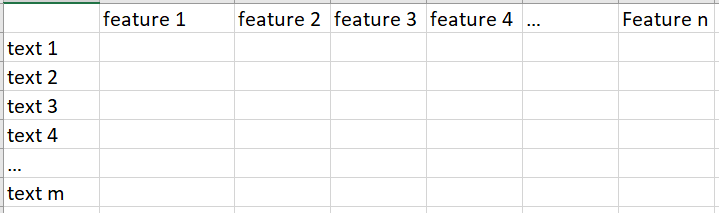

The feature list:

* (1) tf-idf features
* (2) POS-tag features: number of adjective, adverb, auxiliary, punctuation, complementizer, coordinating conjunction, subordinating conjunction, determiner, interjection, noun, possessor, preposition, pronoun, quantifier, verb, and other. (select some of them if you use pos-tag features)
* (3) Linguistic features:
  * number of right-branching nodes across all constituent types
  * number of right-branching nodes for NPs only
  * number of left-branching nodes across all constituent types
  * number of left-branching nodes for NPs only
  * number of premodifiers across all constituent types
  * number of premodifiers within NPs only
  * number of postmodifiers across all constituent types
  * number of postmodifiers within NPs only
  * branching index across all constituent types, i.e. the number of right-branching nodes minus number of left-branching nodes
  * branching index for NPs only
  * branching weight index: number of tokens covered by right-branching nodes minus number of tokens covered by left-branching nodes across all categories
  * branching weight index for NPs only 
  * modification index, i.e. the number of premodifiers minus the number of postmodifiers across all categories
  * modification index for NPs only
  * modification weight index: length in tokens of all premodifiers minus length in tokens of all postmodifiers across all categories
  * modification weight index for NPs only
  * coordination balance, i.e. the maximal length difference in coordinated constituents
  
  * density (density can be calculated using the ratio of folowing function words to content words) of determiners/quantifiers
  * density of pronouns
  * density of prepositions
  * density of punctuation marks, specifically commas and semicolons
  * density of auxiliary verbs
  * density of conjunctions
  * density of different pronoun types: Wh, 1st, 2nd, and 3rd person pronouns
  
  * maximal and average NP length
  * maximal and average AJP length
  * maximal and average PP length
  * maximal and average AVP length
  * sentence length

* Other features in your mind (ie., pre-defined patterns)

In [1]:
# Please write your code here

# 500 textual data from Class Exercise 03.

import pandas as pd
data = pd.read_csv(r"C:\Users\Raheyma Arshad\Desktop\reviews_500.csv")
data = data.drop(['Unnamed: 0', 'star rating'], axis = 1)

# Text Preprocessing

# Removing punctuation
data['review'] = data['review'].str.replace('[^\w\s]','')

# Lower Casing
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Removing frequent words 
high_freq = pd.Series(' '.join(data['review']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
data['cleaned_review'] = data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in high_freq))

# Removing rare words
low_freq = pd.Series(' '.join(data['review']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in low_freq))

# Removing stopwords.
from nltk.corpus import stopwords
import nltk
stop = stopwords.words('english')
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Lemmatization
from textblob import Word
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [2]:
############################################################################################################################

# Feature 01: Number of Words
data['Num of Words'] = data['review'].apply(lambda x: len(str(x).split(" ")))

############################################################################################################################

# Feature 02: Average Word Length
def avg_word_length(text):
    words = text.split()
    return (sum(len(word) for word in words)/len(words))
data['Avg Word Length'] = data['review'].apply(lambda x: avg_word_length(x))

############################################################################################################################

# Feature 03: Number of Nouns
from nltk import pos_tag
import nltk
data['POS_Tags'] = data['cleaned_review'].apply(lambda x: pos_tag(nltk.word_tokenize(x)))

def NounCounter(x):
    nouns = []
    for (word, pos) in x:
        if pos.startswith("NN"):
            nouns.append(word)
    return nouns

data["Nouns"] = data['POS_Tags'].apply(NounCounter)
data["Num of Nouns"] = data["Nouns"].str.len()

############################################################################################################################

# Feature 04: Number of Adjectives
def AdjectiveCounter(x):
    adjectives = []
    for (word, pos) in x:
        if pos.startswith("JJ"):
            adjectives.append(word)
    return adjectives

data["Adjectives"] = data['POS_Tags'].apply(AdjectiveCounter)
data["Num of Adjectives"] = data["Adjectives"].str.len()

############################################################################################################################

# Feature 05: Term Frequencies
from collections import Counter
data['Frequencies'] = data['cleaned_review'].apply(lambda x: Counter(nltk.word_tokenize(x)))

############################################################################################################################

# Feature 06: Normalized Term Frequencies i.e. freq of word/freq of most common term
def TF_normalized(x):
    max_freq = max(x.values())
    tf_list = list(x.items())
    tfs = []
    for (word, freq) in tf_list:
        n_freq = freq/max_freq
        tfs.append((word, n_freq))
    return tfs

data['TF Normalized'] = data['Frequencies'].apply(lambda x: TF_normalized(x))

############################################################################################################################

# Feature 07: Density of Determiners = number of determiners/total number of words.
data['POS_Tags_uncleaned_review'] = data['review'].apply(lambda x: pos_tag(nltk.word_tokenize(x)))

def Density_of_Determiners(x):
    words = []
    for (word, pos) in x:
        words.append(word)
        
    determiners = []
    for (word, pos) in x:
        if pos.startswith("DT"):
            determiners.append(word)
            
    return len(determiners)/len(words)


data["Determiner Density"] = data['POS_Tags_uncleaned_review'].apply(Density_of_Determiners)

############################################################################################################################

# Feature 08: Density of Conjunctions = number of conjunctions/total number of words.
def Density_of_Conjunctions(x):
    words = []
    for (word, pos) in x:
        words.append(word)
        
    conjunctions = []
    for (word, pos) in x:
        if pos.startswith("CC"):
            conjunctions.append(word)
            
    return len(conjunctions)/len(words)

data["Conjunction Density"] = data['POS_Tags_uncleaned_review'].apply(Density_of_Conjunctions)

############################################################################################################################

# Feature 09: Roots, Root Heads, and Dependency Relation between Roots and Heads of Noun Chunks
import spacy
nlp = spacy.load("en_core_web_sm")

def roots_of_noun_chunks(x):
    doc = nlp(str(x))
    chunks = list(doc.noun_chunks)
    roots = []
    for chunk in chunks:
        roots.append(chunk.root.text)
    return roots    
    
def root_heads(x):
    doc = nlp(str(x))
    chunks = list(doc.noun_chunks)
    heads = []
    for chunk in chunks:
        heads.append(chunk.root.head.text)
    return heads    

def dep_relation_root_head(x):
    doc = nlp(str(x))
    chunks = list(doc.noun_chunks)
    dep_relations = []
    for chunk in chunks:
        dep_relations.append(chunk.root.dep_)
    return dep_relations    

data['Roots of Noun Chunks'] = data['cleaned_review'].apply(lambda x: roots_of_noun_chunks(x))    
data['Root Heads of Noun Chunks'] = data['cleaned_review'].apply(lambda x: root_heads(x))  
data['Dependency Relations between Roots and Heads of Noun Chunks'] = data['cleaned_review'].apply(lambda x: dep_relation_root_head(x))  

############################################################################################################################

# Feature 10: Named Entity Recognition
import os
java_path = r"C:\Program Files\Java\jre1.8.0_261\bin\java.exe"
os.environ['JAVAHOME'] = java_path
from nltk.tag import StanfordNERTagger

st = StanfordNERTagger(r"C:\Users\Raheyma Arshad\Desktop\stanford-ner-4.0.0\classifiers\english.muc.7class.distsim.crf.ser.gz",
                       r"C:\Users\Raheyma Arshad\Desktop\stanford-ner-4.0.0\stanford-ner.jar")

data['NER'] = data['cleaned_review'].apply(lambda x: st.tag(nltk.word_tokenize(x)))

def PersonNameCounter(x):
    person_names = []
    for (word, description) in x:
        if description.startswith("PERSON"):
            person_names.append(word)
    return person_names

data['Person_Names'] = data['NER'].apply(PersonNameCounter)
data['Person_Names_Count'] = data['Person_Names'].str.len()

def OrganizationCounter(x):
    organizations = []
    for (word, description) in x:
        if description.startswith("ORGANIZATION"):
            organizations.append(word)
    return organizations

data['Organizations'] = data['NER'].apply(OrganizationCounter)
data['Organizations_Count'] = data['Organizations'].str.len()

def LocationCounter(x):
    locations = []
    for (word, description) in x:
        if description.startswith("LOCATION"):
            locations.append(word)
    return locations

data['Locations'] = data['NER'].apply(LocationCounter)
data['Locations_Count'] = data['Locations'].str.len()

def ProductCounter(x):
    products = []
    for (word, description) in x:
        if description.startswith("PRODUCT"):
            products.append(word)
    return products

data['Products'] = data['NER'].apply(ProductCounter)
data['Products_Count'] = data['Products'].str.len()

def DateCounter(x):
    dates = []
    for (word, description) in x:
        if description.startswith("DATE"):
            dates.append(word)
    return dates

data['Dates'] = data['NER'].apply(DateCounter)
data['Dates_Count'] = data['Dates'].str.len()

In [6]:
output = pd.DataFrame(data[['review', 'Num of Words', 'Avg Word Length', 'Num of Nouns', 'Num of Adjectives', 'Frequencies',
                            'TF Normalized', 'Determiner Density', 'Conjunction Density', 'Roots of Noun Chunks',
                            'Root Heads of Noun Chunks', 'Dependency Relations between Roots and Heads of Noun Chunks',
                            'Person_Names_Count', 'Organizations_Count', 'Locations_Count', 'Products_Count', 'Dates_Count']])

output.head(5)

,review,Num of Words,Avg Word Length,Num of Nouns,Num of Adjectives,Frequencies,TF Normalized,Determiner Density,Conjunction Density,Roots of Noun Chunks,Root Heads of Noun Chunks,Dependency Relations between Roots and Heads of Noun Chunks,Person_Names_Count,Organizations_Count,Locations_Count,Products_Count,Dates_Count
0,msg in moviesbooksmusicvginternet andrew jacks...,364,4.967033,103,42,"{'msg': 1, 'moviesbooksmusicvginternet': 1, 'a...","[(msg, 0.2), (moviesbooksmusicvginternet, 0.2)...",0.082418,0.019231,"[organization, comedy, population, creativity,...","[return, released, sucked, want, need, includi...","[dobj, dobj, dobj, nsubj, nsubj, pobj, nsubj, ...",2,0,0,0,0
1,there is no way that i could describe my emoti...,588,4.319728,120,59,"{'way': 1, 'could': 4, 'describe': 1, 'emotion...","[(way, 0.06666666666666667), (could, 0.2666666...",0.079258,0.043845,"[way, movie, i, movie, i, story, storytelling,...","[describe, describe, speechless, cried, m, tol...","[nsubj, dobj, nsubj, dobj, nsubj, nsubj, nsubj...",0,0,0,0,0
2,i have to say my first reaction walking out of...,590,4.459322,135,62,"{'say': 1, 'first': 1, 'reaction': 2, 'walking...","[(say, 0.14285714285714285), (first, 0.1428571...",0.083051,0.033898,"[reaction, cinema, movie, story, hulk, thor, t...","[say, walking, ca, enlightened, found, hilario...","[nsubj, dobj, nsubj, nsubj, nsubj, nsubj, nsub...",0,0,0,0,2
3,after avengers infinity war we waited for the ...,464,4.689655,113,61,"{'avenger': 8, 'infinity': 3, 'war': 3, 'waite...","[(avenger, 0.8), (infinity, 0.3), (war, 0.3), ...",0.148707,0.021552,"[war, avenger, story, hero, thanos, theory, av...","[waited, waited, go, go, end, put, put, antici...","[nsubj, dobj, nsubj, dobj, dobj, nsubj, dobj, ...",0,0,0,0,1
4,if youre going to watch this movie avoid any s...,114,4.289474,25,10,"{'youre': 1, 'going': 3, 'watch': 1, 'movie': ...","[(youre, 0.2), (going, 0.6), (watch, 0.2), (mo...",0.122807,0.017544,"[you, movie, spoiler, review, i, anything, cro...","[going, avoid, avoid, avoid, m, opinion, appla...","[nsubj, nsubj, dobj, dobj, nsubj, nsubj, nsubj...",0,0,0,0,1
